<a href="https://colab.research.google.com/github/StephRoos/Kaggle_Survey/blob/main/2021_Kaggle_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploratory Data Analysis

In [198]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings(action='ignore')


In [199]:
df = pd.read_csv('https://raw.githubusercontent.com/StephRoos/Kaggle_Survey/main/kaggle_survey_2021_responses.csv')
df_q = df.iloc[0, :].T
df_a = df.iloc[1:, :]

In [200]:
df_a.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Age Distribution of Kagglers

In [201]:
# Create a table with age distribution by gender

df_age_gender = df_a[['Q1', 'Q2']].value_counts().reset_index()
df_age_gender.columns = ['Age', 'Gender', 'Counts']
df_age_gender = df_age_gender[df_age_gender['Gender'].isin(['Man', 'Woman'])]
df_age_gender = pd.pivot(data=df_age_gender, index='Age', columns='Gender', values='Counts')

In [202]:
df_age_gender

Gender,Man,Woman
Age,,
18-21,3696,1117
22-24,3643,963
25-29,3859,994
30-34,2765,618
35-39,1993,455
40-44,1537,317
45-49,1171,175
50-54,811,136
55-59,509,72


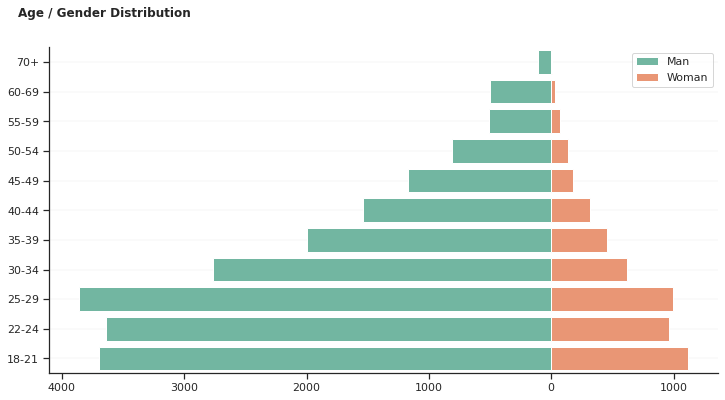

In [203]:
# Sort by age
data = df_age_gender.copy()
data.sort_index(ascending=False, inplace=True)
data['Man'] = -data['Man']

# Create a Pyramid plot with Age/Gender distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Man'], y=data.index, color='C0', label='Man')
sns.barplot(x=data['Woman'], y=data.index, color='C1', label='Woman')

ax.set_xlabel('')
ax.set_xticklabels(abs(ax.get_xticks().astype(int)))
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Age / Gender Distribution', fontsize=12, fontweight='bold')   

ax.legend()
plt.show()


In 2021 Kaggle's users are dominantly by man (79.3%), and woman (18.8%).

## Kagglers around the globe

In [204]:
# Create a table with number of Kagglers by country

df_countries = pd.DataFrame(df_a.groupby('Q3', dropna = False).size())
df_countries.index.name = 'Country'
df_countries.columns = ['Kagglers']
df_countries.sort_values(by='Kagglers', ascending=False, inplace=True)
df_countries = np.round(df_countries / df_countries.sum() *100, 1)
df_countries.rename(index={'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_countries.head(10)

,Kagglers
Country,
India,28.6
USA,10.2
Other,4.9
Japan,3.5
China,3.1
Brazil,2.9
Russia,2.9
Nigeria,2.7
UK,2.1


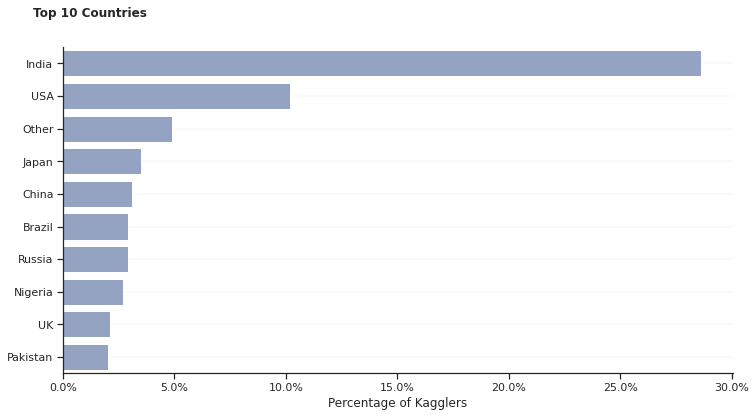

In [205]:
data = df_countries.copy()
data = data[0:10]

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C2')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Top 10 Countries', fontsize=12, fontweight='bold')

plt.show()

India is obviously the number one country of Kagglers (28.6%). Second position is the USA (10.2%) with a big gap almost 20%, then another big gap to the 3rd place filled by users from Japan, China, Brazil, Russia and Nigeria with about the same percentage around 3%.

## Education Qualification of Kagglers

In [206]:
# Create a table with number of Kagglers by country

df_education = pd.DataFrame(df_a.groupby('Q4', dropna = False).size())
df_education.index.name = 'Education'
df_education.columns = ['Kagglers']
df_education.sort_values(by='Kagglers', ascending=False, inplace=True)
df_education = np.round(df_education/ df_education.sum() *100, 1)
df_education.rename(index={'Some college/university study without earning a bachelor’s degree': 'Some college', 'No formal education past high school':'High school'}, inplace=True)
df_education

,Kagglers
Education,
Master’s degree,39.0
Bachelor’s degree,38.1
Doctoral degree,10.8
Some college,6.7
I prefer not to answer,2.4
High school,1.6
Professional doctorate,1.4


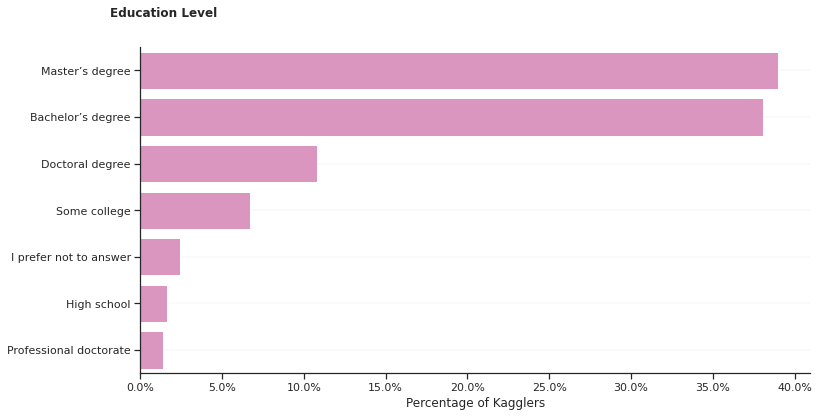

In [207]:
data = df_education.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data['Kagglers'], y=data.index, color='C3')

ax.set_xlabel('Percentage of Kagglers')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('')
ax.set_yticklabels(data.index)

ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Education Level', fontsize=12, fontweight='bold')

plt.show()

More than 77.1% of Kagglers have master's and bachelor's degree, 12.2% have doctoral degree, 1.4% professional doctorate, 8.3% does not have a formal degree, and 1.6% has high school education.

## Current Role of Kagglers

In [208]:
# Create a table with roles of Kagglers

df_roles = pd.DataFrame(df_a.groupby('Q5', dropna = False).size())
df_roles.index.name = 'Roles'
df_roles.columns = ['Kagglers']
df_roles.sort_values(by='Kagglers', ascending=False, inplace=True)
df_roles = np.round(df_roles/ df_roles.sum() *100, 1)

In [209]:
df_roles

,Kagglers
Roles,
Student,26.2
Data Scientist,13.9
Software Engineer,9.4
Other,9.2
Data Analyst,8.9
Currently not employed,7.6
Research Scientist,5.9
Machine Learning Engineer,5.8
Business Analyst,3.7


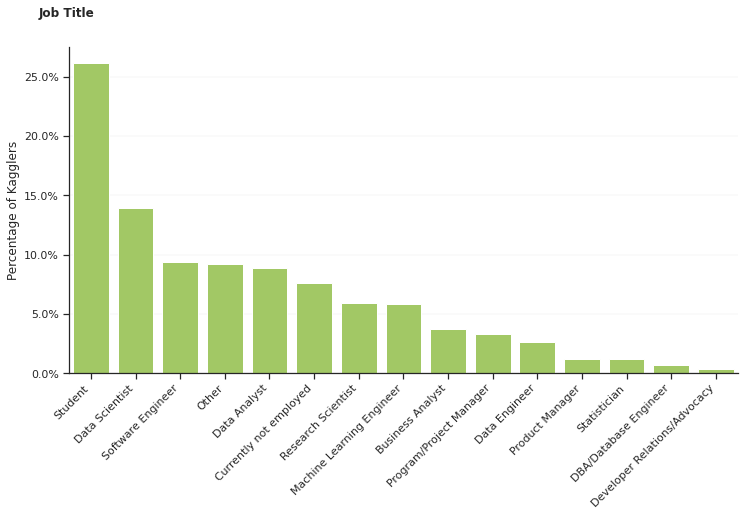

In [210]:
data = df_roles.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data['Kagglers'], color='C4')

ax.set_xlabel('')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Job Title', fontsize=12, fontweight='bold')

plt.show()

Kaggle users are mostly students (26.2%). Half of it the second job role is Data Scientist (13.9%). The third is about same percentage are software engineer and data analyst, 9.4% and 9.2% respectively.

## Writing Code Experience of Kagglers

In [211]:
# Create a table with experience of Kagglers

q6_order = [
    'I have never written code', '< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']

df_experience = df_a['Q6'].value_counts()[q6_order]
df_experience.index.name = 'Writting Code Experience'
df_experience = np.round(df_experience / df_experience.sum() *100, 1)
df_experience.columns = ['Kagglers (%)']


In [212]:
df_experience

Writting Code Experience
I have never written code     4.0
< 1 years                    22.6
1-3 years                    30.3
3-5 years                    15.6
5-10 years                   11.9
10-20 years                   8.3
20+ years                     7.2
Name: Q6, dtype: float64

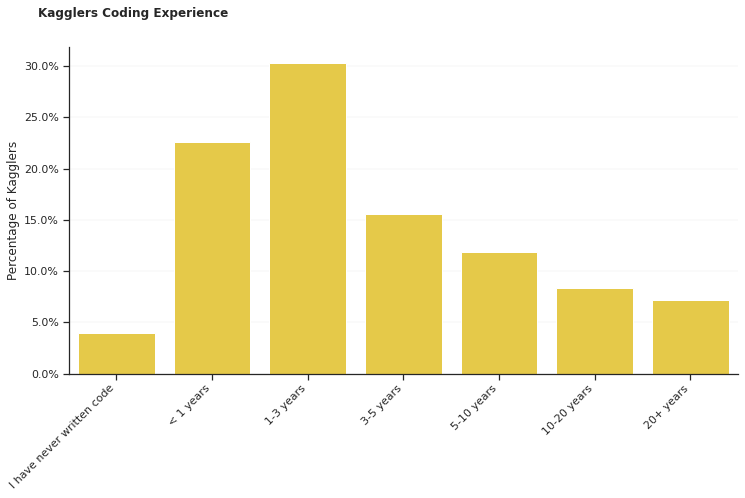

In [213]:
data = df_experience.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data, color='C5')

ax.set_xlabel('')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Kagglers Coding Experience', fontsize=12, fontweight='bold')

plt.show()

The majority of Kagglers have less than 3 years of coding experience

In [214]:
# Replace '$',',','>' in 'Q25' column
df_a = df_a.dropna(subset=['Q25'])
df_a['Salary_cleaned'] = df_a['Q25'].apply(lambda x: str(x).replace('$','').replace(',','').replace('>','').strip())

#create min range, max range and mean for salary
df_a['Salary_min'] = df_a['Salary_cleaned'].apply(lambda x: int(x.split('-')[0]) if '-' in str(x) else int(x))
df_a['Salary_max'] = df_a['Salary_cleaned'].apply(lambda x: int(x.split('-')[1]) if '-' in str(x) else int(x))
df_a['Approx_salary'] = np.ceil((df_a['Salary_min'] + df_a['Salary_max']) / 2).astype(int)

#Create a table with approximate salary of Kagglers
df_salary = pd.DataFrame(df_a.groupby('Approx_salary', dropna = False).size())
df_salary.index.name = 'Salary'
df_salary.columns = ['Kagglers']

df_salary = np.round(df_salary/ df_salary.sum() *100, 1)
df_salary.sort_index(ascending=True, inplace=True)

#df_salary = np.round(df_salary/ df_salary.sum() *100, 1)

In [215]:
df_salary


,Kagglers
Salary,
500,21.9
1500,6.3
2500,3.7
3500,2.5
4500,3.0
6250,4.5
8750,3.6
12500,6.2
17500,3.7


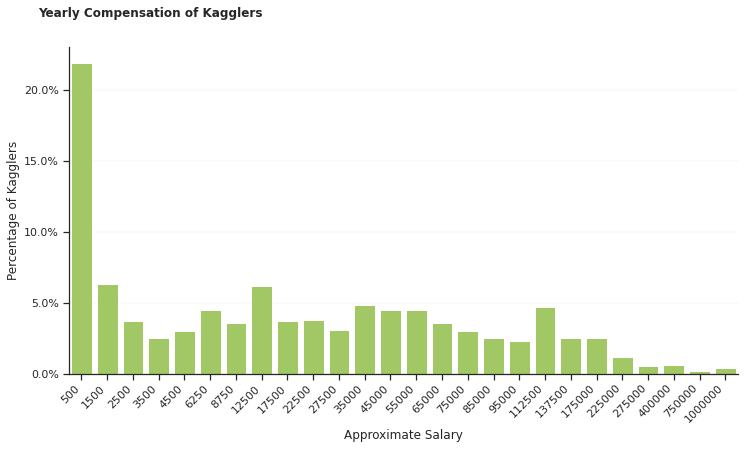

In [216]:
data = df_salary.copy()

# Create a bar plot with country distribution
fig, ax = plt.subplots(1,1, figsize=(12, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="Set2", rc=custom_params)
ax.grid(axis='y', linestyle='-', alpha=1)

sns.barplot(x=data.index, y=data['Kagglers'], color='C4')

ax.set_xlabel('Approximate Salary')
ax.set_xticklabels(data.index)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
ax.set_ylabel('Percentage of Kagglers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


ax.grid(which='major', axis='y', zorder=0, color='#CDD0CB', lw=0.3, alpha=0.6)

fig.text(0.09, 0.95, 'Yearly Compensation of Kagglers', fontsize=12, fontweight='bold')

plt.show()

A lot of Kagglers are students. It explains that most of the Kagglers have no or very low compensation.

# Model
Predict the Kagglers salary based on previous data

## Data Preprocessing

In [217]:
#filter for men & women
df_model = df_a[df_a.Q2.isin(['Man','Woman'])]
#filter for workers
df_model = df_model[~df_model['Q5'].isin(['Student','Currently not employed'])]
df_model.drop('Time from Start to Finish (seconds)', axis =1, inplace = True)

In [218]:
df_model

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Salary_cleaned,Salary_min,Salary_max,Approx_salary
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25000-29999,25000,29999,27500
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,None,NaN,60000-69999,60000,69999,65000
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0-999,0,999,500
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,30000-39999,30000,39999,35000
5,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,30000-39999,30000,39999,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,3000-3999,3000,3999,3500
25968,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,80000-89999,80000,89999,85000
25969,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15000-19999,15000,19999,17500
25971,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,NaN,0-999,0,999,500


In [219]:
df_model_fin = df_model[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Approx_salary']]

In [220]:
df_model_fin

,Q1,Q2,Q3,Q4,Q5,Q6,Approx_salary
1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,27500
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,65000
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,500
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,35000
5,45-49,Man,India,Doctoral degree,Other,< 1 years,35000
...,...,...,...,...,...,...,...
25967,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,3500
25968,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,85000
25969,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,17500
25971,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,500


In [221]:
# create dummy variables, this is needed because essentially all our data is categorical
model_dummies = pd.get_dummies(df_model_fin)
model_dummies

,Approx_salary,Q1_18-21,Q1_22-24,Q1_25-29,Q1_30-34,Q1_35-39,Q1_40-44,Q1_45-49,Q1_50-54,Q1_55-59,...,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q6_1-3 years,Q6_10-20 years,Q6_20+ years,Q6_3-5 years,Q6_5-10 years,Q6_< 1 years,Q6_I have never written code
1,27500,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,65000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,500,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,35000,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,35000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,3500,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25968,85000,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
25969,17500,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25971,500,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


### Model with only the gender

In [250]:
# We only need one gender in this case because we trimmed it to only have Men & Women
y = model_dummies['Approx_salary']
X = model_dummies.iloc[:, 1:]
X

,Q1_18-21,Q1_22-24,Q1_25-29,Q1_30-34,Q1_35-39,Q1_40-44,Q1_45-49,Q1_50-54,Q1_55-59,Q1_60-69,...,Q5_Research Scientist,Q5_Software Engineer,Q5_Statistician,Q6_1-3 years,Q6_10-20 years,Q6_20+ years,Q6_3-5 years,Q6_5-10 years,Q6_< 1 years,Q6_I have never written code
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25968,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
25969,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25971,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [251]:
reg = LinearRegression().fit(X, y)

In [252]:
reg.score(X, y)

0.238795943372743